In [1]:
from datetime import datetime, timedelta
import numpy as np
import random
import networkx as nx

from simulation_core.infrastructure import *
from simulation_core.signaling import *
from simulation_core.network import *
from simulation_core.train import *
from simulation_core.dispatching.Dispatcher import Dispatcher
from simulation_test.sim import *

from itertools import combinations, permutations

import matplotlib.pyplot as plt
import matplotlib.dates as mdates



sim_init_time = datetime.strptime('2018-01-10 10:00:00', "%Y-%m-%d %H:%M:%S")
sim_term_time = datetime.strptime('2018-01-10 15:30:00', "%Y-%m-%d %H:%M:%S")
spd_container = [random.uniform(0.01, 0.02) for i in range(20)]
acc_container = [0.5*random.uniform(2.78e-05*0.85, 2.78e-05*1.15) for i in range(20)]
dcc_container = [0.2*random.uniform(2.78e-05*0.85, 2.78e-05*1.15) for i in range(20)]
headway = 300 + random.random() * 400
sys = System(sim_init_time, spd_container, acc_container, dcc_container,
             term_time=sim_term_time,
             dos_period=['2018-01-10 11:30:00', '2018-01-10 12:30:00'],  
             dos_pos=(15,20),
             headway=headway, 
             refresh_time=50)
dp = Dispatcher(sys)
# K165 = Train(sys, 
#              ((sys.signal_points[0],1),(sys.signal_points[1],0)),
#              ((sys.signal_points[10],1),(None,None)),
#              max_spd=random.choice(sys.spd_container),
#              max_acc=random.choice(sys.acc_container),
#              max_dcc=random.choice(sys.dcc_container),
#              length=1)
# T165 = Train(sys, 
#              ((None,None),(sys.signal_points[0],0)),
#              ((sys.signal_points[10],1),(None,None)),
#              max_spd=K165.max_spd*1.02,
#              max_acc=random.choice(sys.acc_container),
#              max_dcc=random.choice(sys.dcc_container),
#              length=1)
# K166 = Train(sys, 
#              ((sys.signal_points[10],0),(sys.signal_points[9],1)),
#              ((sys.signal_points[0],0),(None,None)),
#              max_spd=random.choice(sys.spd_container),
#              max_acc=random.choice(sys.acc_container),
#              max_dcc=random.choice(sys.dcc_container),
#              length=1)
# T166 = Train(sys, 
#              ((None,None),(sys.signal_points[10],1)),
#              ((sys.signal_points[0],0),(None,None)),
#              max_spd=K166.max_spd*1.02,
#              max_acc=random.choice(sys.acc_container),
#              max_dcc=random.choice(sys.dcc_container),
#              length=1)

In [2]:
def launch(downtrain=True):
    while sys.sys_time - sys.init_time <= sys.term_time - sys.init_time:
        _semaphore_to_return = False
        for t in sys.trains:
            t.request_routing()
            t.update_acc()
        if sys.sys_time+sys.refresh_time - sys.last_train_init_time >= sys.headway:
            if downtrain:
                if not sys.signal_points[0].curr_train_with_route.keys():
                    if all([t.curr_routing_path_segment != ((None,None),(sys.signal_points[0],0)) for t in sys.trains]):
                        if not sys.signal_points[0].track_by_port[1].trains:
                            t = sys.generate_train( sys.signal_points[0],0,
                                                    sys.signal_points[10],1,
                                                    length=1)
            else:
                if not sys.signal_points[10].curr_train_with_route.keys():
                    if all([t.curr_routing_path_segment != ((None,None),(sys.signal_points[10],1)) for t in sys.trains]):
                        if not sys.signal_points[10].track_by_port[0].trains:
                            t = sys.generate_train( sys.signal_points[10],1,
                                                    sys.signal_points[0],0,
                                                    length=1)
        sys.sys_time+=sys.refresh_time
launch(downtrain=False)

train idx: 0 occupying:[((None, None), (CtrlPnt10, 1))] head MP:50.00 rear MP:51.00, requested (1, 0) at 50.0
	route (1, 0) of CtrlPnt10 is opened
train train idx: 0 occupying:[((None, None), (CtrlPnt10, 1))] head MP:50.00 rear MP:51.00 initiated, entering into Track <MP: 45.0~50.0 > <AutoPnt 9 port: 1~CtrlPnt10 port: 0> key: 0
	route (1, 0) of CtrlPnt10 is closed
train idx: 0 occupying:[((CtrlPnt10, 0), (AutoPnt 9, 1)), ((None, None), (CtrlPnt10, 1))] head MP:50.00 rear MP:51.00, requested (1, 0) at 40.0
	route (1, 0) of CtrlPnt 8 is opened
train idx: 1 occupying:[((None, None), (CtrlPnt10, 1))] head MP:50.00 rear MP:51.00, requested (1, 0) at 50.0
	route (1, 0) of CtrlPnt10 is opened
train train idx: 1 occupying:[((None, None), (CtrlPnt10, 1))] head MP:50.00 rear MP:51.00 initiated, entering into Track <MP: 45.0~50.0 > <AutoPnt 9 port: 1~CtrlPnt10 port: 0> key: 0
	route (1, 0) of CtrlPnt10 is closed
	route (1, 0) of CtrlPnt 8 is closed
train idx: 0 occupying:[((CtrlPnt 8, 0), (CtrlPn

train idx: 4 occupying:[((AutoPnt11, 0), (CtrlPnt 5, 3)), ((AutoPnt12, 0), (AutoPnt11, 1))] head MP:29.02 rear MP:30.02, requested (3, 0) at 25.0
	route (3, 0) of CtrlPnt 5 is opened
train idx: 6 occupying:[((None, None), (CtrlPnt10, 1))] head MP:50.00 rear MP:51.00, requested (1, 0) at 50.0
	route (1, 0) of CtrlPnt10 is opened
train train idx: 6 occupying:[((None, None), (CtrlPnt10, 1))] head MP:50.00 rear MP:51.00 initiated, entering into Track <MP: 45.0~50.0 > <AutoPnt 9 port: 1~CtrlPnt10 port: 0> key: 0
	route (1, 0) of CtrlPnt10 is closed
	route (1, 0) of CtrlPnt 8 is closed
	route (1, 0) of CtrlPnt 2 is closed
train idx: 5 occupying:[((CtrlPnt 8, 0), (CtrlPnt 7, 1)), ((AutoPnt 9, 0), (CtrlPnt 8, 1))] head MP:39.94 rear MP:40.94, requested (1, 0) at 35.0
	route (1, 0) of CtrlPnt 7 is opened
train idx: 2 occupying:[((CtrlPnt 2, 0), (AutoPnt 1, 1)), ((CtrlPnt 3, 0), (CtrlPnt 2, 1))] head MP: 9.82 rear MP:10.82, requested (1, 0) at 0.0
	route (1, 0) of CtrlPnt 0 is opened
	route (1, 

	route (1, 0) of CtrlPnt 6 is closed
train idx:10 occupying:[((CtrlPnt10, 0), (AutoPnt 9, 1)), ((None, None), (CtrlPnt10, 1))] head MP:49.94 rear MP:50.94, requested (1, 0) at 40.0
	route (1, 0) of CtrlPnt 8 is opened
	route (1, 0) of CtrlPnt 3 is closed
train idx: 6 occupying:[((CtrlPnt 3, 0), (CtrlPnt 2, 1)), ((CtrlPnt 4, 0), (CtrlPnt 3, 1))] head MP:14.90 rear MP:15.90, requested (1, 0) at 10.0
	route (1, 0) of CtrlPnt 2 is opened
train idx: 7 occupying:[((CtrlPnt 4, 2), (CtrlPnt 3, 3))] head MP:15.04 rear MP:16.04, requested (3, 0) at 15.0
	route (3, 0) of CtrlPnt 3 is opened
	route (3, 0) of CtrlPnt 5 is closed
train idx: 9 occupying:[((CtrlPnt 5, 0), (CtrlPnt 4, 1)), ((AutoPnt11, 0), (CtrlPnt 5, 3))] head MP:24.78 rear MP:25.78, requested (1, 0) at 20.0
	route (1, 0) of CtrlPnt 4 is opened
train idx:11 occupying:[((None, None), (CtrlPnt10, 1))] head MP:50.00 rear MP:51.00, requested (1, 0) at 50.0
	route (1, 0) of CtrlPnt10 is opened
train train idx:11 occupying:[((None, None), (

No handles with labels found to put in legend.


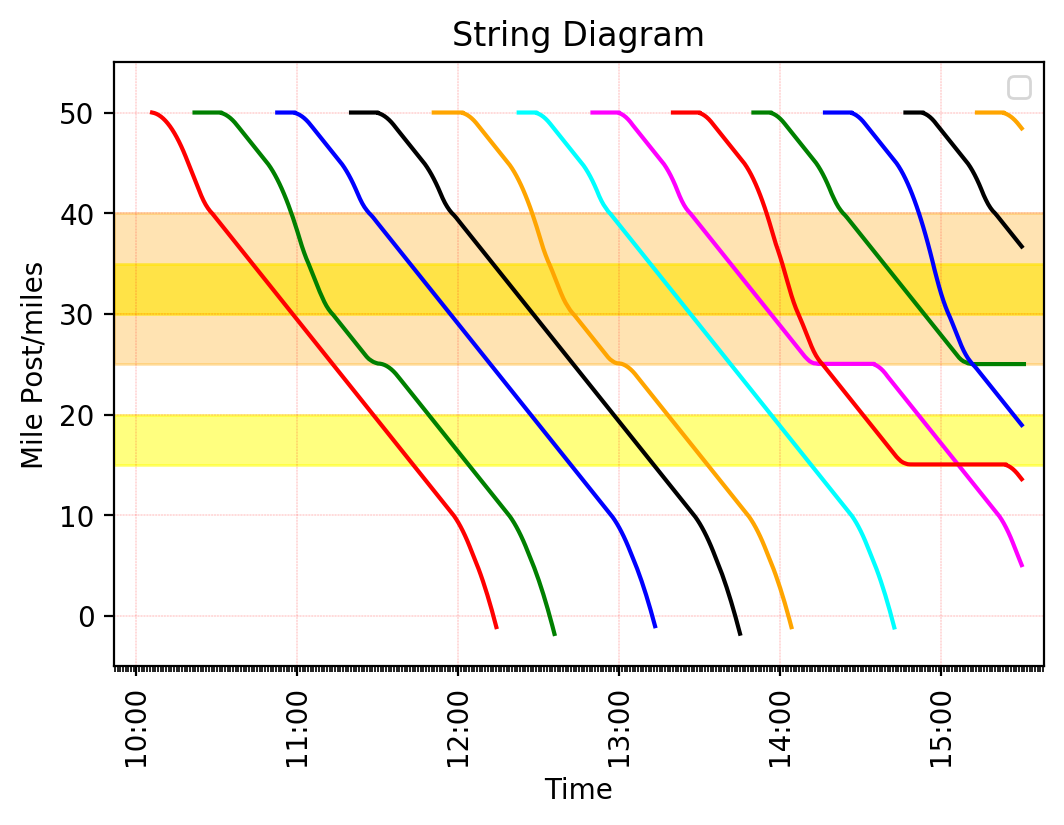

In [3]:
string_diagram(sys)

No handles with labels found to put in legend.


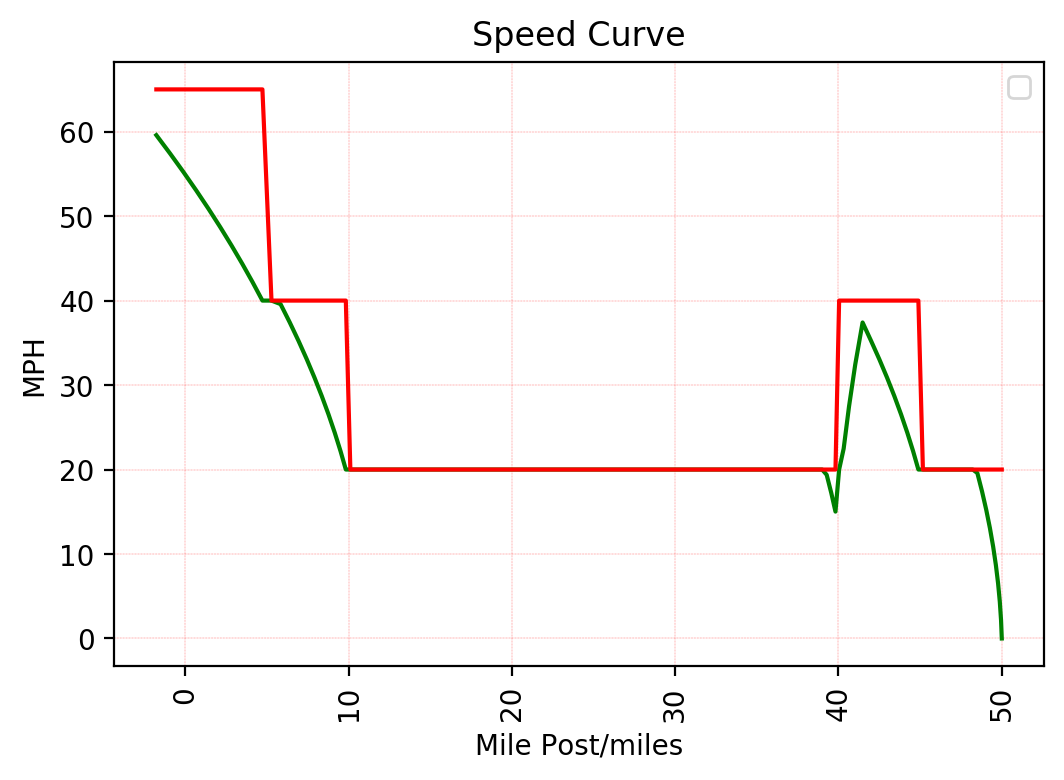

<Figure size 1440x1280 with 0 Axes>

In [4]:
speed_curve(sys,sys.trains[3])

In [5]:
K165.curr_home_sig.route

NameError: name 'K165' is not defined

In [ ]:
dp.get_route(sys.signal_points[8], 0, sys.signal_points[9],1,mainline=False)

In [ ]:
dp.get_all_routes(sys.signal_points[8], 1, sys.signal_points[11], 0)

In [ ]:
shortest_path(sys.G_origin, sys.signal_points[8], sys.signal_points[8])

In [ ]:
dp.get_route(sys.signal_points[8], 1, sys.signal_points[11], 0)